Librerías necesarias para ejecutar el notebook

In [7]:
import Pkg; Pkg.add("GLM")

  Resolving package versions...
No Changes to `C:\Users\pedro\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\pedro\.julia\environments\v1.5\Manifest.toml`


In [9]:
using StatsBase;
using Statistics;
using Plots;
using DataFrames;
using StatsPlots;
using GLM;

┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1278


In [3]:
gr(fmt=:png);

Ahora vamos a crear los datos que nos hacen falta, los dos vectores de pesos y altura:

In [10]:
Altura=[176,182,167,172,169,191,177,161,173,168];
Peso=[68,76,61,65,70,79,69,56,61,64];

A continuación vamos a crear un DataFrame con los datos, sobre todo porque visualmente queda más elegante, y es necesario para los cálculos con GML.

In [11]:
tablaAPNLL=DataFrame(Altura=Altura,Peso=Peso)

,Altura,Peso
,Int64,Int64
1,176,68
2,182,76
3,167,61
4,172,65
5,169,70
6,191,79
7,177,69
8,161,56
9,173,61


Ahora que ya tenemos los datos en forma de DataFrame podemos calcular las rectas de regresión entre la Altura y el Peso, y entre el Peso y la Altura, pare ello vamos a usar la función fit() del paquete GML, que asigna el modelo de regresión lineal que mejor se adapte a los datos, los datos los pasaremos con la macro “@formula(Y ~X)”, que asigna el modelo entre X como variable independiente y Y como variable dependiente.
En nuestro caso tenemos que ejecutar:


In [12]:
olsAP = lm(@formula(Peso ~ Altura), tablaAPNLL);
olsPA = lm(@formula(Altura ~ Peso), tablaAPNLL);

Dende el segundo parámetro de la función fit(), es nuestro DataFrame con los datos, y donde antes poníamos X e Y ahora ponemos el nombre de las columnas de nuestro DataFrame que vamos a usar como datos.

Con la función coef(), podemos ver los coeficientes que mejor se adaptan a nuestro modelo:


In [13]:
coef(olsAP)

2-element Array{Float64,1}:
 -62.04164096235121
   0.742751388031977

Ya estamos en condiciones de crear la función que nos permita calcular las rectas de regresión:

In [14]:
function rectaRegresion(x,y0,pendiente)
   return pendiente*x+y0
end

rectaRegresion (generic function with 1 method)

Ahora necesitamos el dominio de cada variable:

In [15]:
xGrid=minimum(Altura):maximum(Altura);
yGrid=minimum(Peso):maximum(Peso);

Y ya tenemos todo lo necesario para calcular las restas de regresión:

In [16]:
rectaPA2=[rectaRegresion(x,coef(olsAP)[1],coef(olsAP)[2]) for x in xGrid];
rectaAP2=[rectaRegresion(x,coef(olsPA)[1],coef(olsPA)[2]) for x in yGrid];

Ya solo no queda mostrar todo junto en el un gráfico:

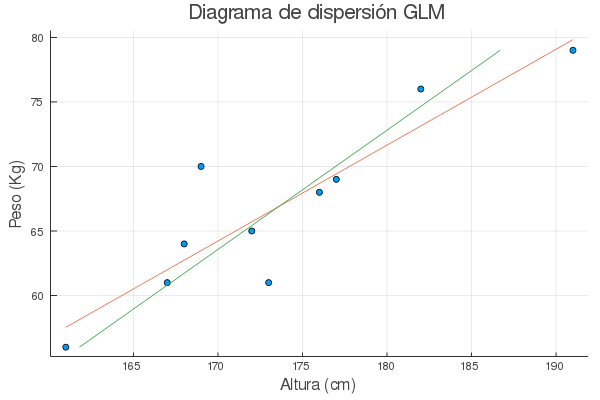

In [17]:
scatter(Altura,Peso,title = "Diagrama de dispersión GLM",xlabel="Altura (cm)",ylabel="Peso (Kg)",legend = false)
plot!(xGrid, rectaPA2,label="GLMPA")
plot!(rectaAP2, yGrid,label="GLMAP")